In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv('cleaned_amazon_sales_analysis_ready.csv')

# Step 1 & 2: Group data to find trends by Discount and Rating
# We create bins to group discounts (e.g., 0-10%, 10-20%)
df['discount_group'] = pd.cut(df['discount_percentage'],
                               bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                               labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%',
                                       '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])

# Calculate average popularity (rating_count) for each discount group
trend_by_discount = df.groupby('discount_group')['rating_count'].mean().reset_index()
print("Step 1 & 2 Complete: Data grouped by discount ranges.")
print(trend_by_discount.head(10))

Step 1 & 2 Complete: Data grouped by discount ranges.
  discount_group  rating_count
0          0-10%  16185.285714
1         10-20%  16486.489583
2         20-30%  24242.048780
3         30-40%  16517.655172
4         40-50%  16739.071429
5         50-60%  14566.648438
6         60-70%  28859.090909
7         70-80%  15354.212500
8         80-90%   9274.849057
9        90-100%  12351.833333


C:\Users\khush\AppData\Local\Temp\ipykernel_26208\3420951459.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_by_discount = df.groupby('discount_group')['rating_count'].mean().reset_index()


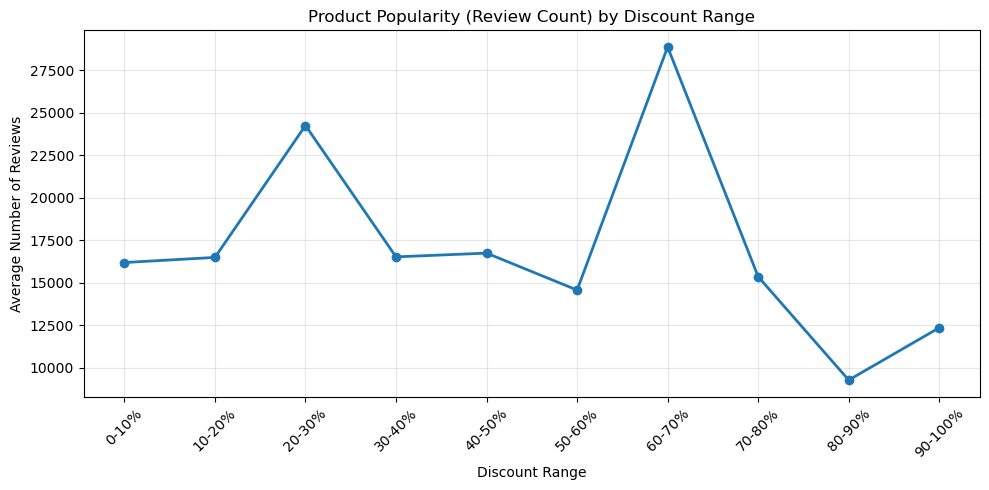

Step 3 Complete: Line chart created.


In [10]:
# Step 3: Create a line chart
plt.figure(figsize=(10,5))
plt.plot(trend_by_discount['discount_group'], trend_by_discount['rating_count'], marker='o', linewidth=2)
plt.title('Product Popularity (Review Count) by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Number of Reviews')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Step 3 Complete: Line chart created.")

In [11]:
# Step 6: Calculate Estimated Revenue (Price * Reviews as a proxy)
df['estimated_revenue'] = df['discounted_price'] * df['rating_count']

# Step 7: Identify Top 10 Products
top_10_products = df[['product_name', 'main_category', 'rating_count', 'estimated_revenue']].sort_values(by='estimated_revenue', ascending=False).head(10)
print("Step 6 & 7 Complete: Top 10 Products Identified.")
print(top_10_products)

Step 6 & 7 Complete: Top 10 Products Identified.
                                          product_name main_category  \
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   Electronics   
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   Electronics   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   Electronics   
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...   Electronics   
124  Redmi 126 cm (50 inches) 4K Ultra HD Android S...   Electronics   
72   Redmi 108 cm (43 inches) 4K Ultra HD Android S...   Electronics   
568  Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...   Electronics   
332  MI 138.8 cm (55 inches) 5X Series 4K Ultra HD ...   Electronics   
91   OnePlus 108 cm (43 inches) Y Series Full HD Sm...   Electronics   
197  MI 108 cm (43 inches) 5A Series Full HD Smart ...   Electronics   

     rating_count  estimated_revenue  
370        313836       2.667292e+09  
566        313832       2.353426e+09  
371        313836       2.039620e+09  
47

Step 8 Complete: Top 5 Categories Identified.
                       total_revenue  avg_rating
main_category                                   
Electronics             5.917975e+10    4.081749
Computers&Accessories   6.354569e+09    4.154967
Home&Kitchen            6.264336e+09    4.040848
MusicalInstruments      6.445808e+07    3.900000
OfficeProducts          4.578673e+07    4.309677


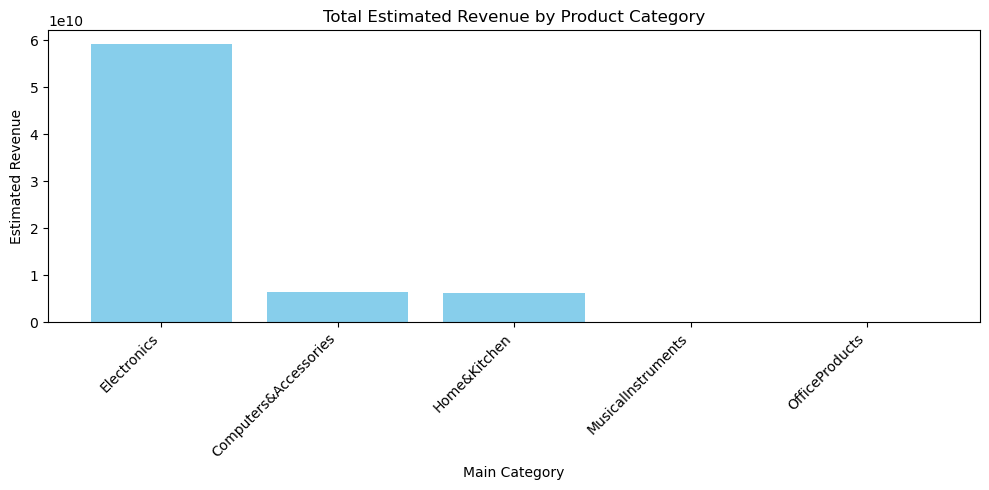

Step 9 Complete: Bar chart created.


In [12]:
# Step 8: Analyze Best-Performing Categories
top_categories = df.groupby('main_category').agg(
    total_revenue=('estimated_revenue', 'sum'),
    avg_rating=('rating', 'mean')
).sort_values(by='total_revenue', ascending=False).head(5)

print("Step 8 Complete: Top 5 Categories Identified.")
print(top_categories)

# Step 9: Create a Bar Chart Visualization
plt.figure(figsize=(10,5))
plt.bar(top_categories.index, top_categories['total_revenue'], color='skyblue')
plt.title('Total Estimated Revenue by Product Category')
plt.xlabel('Main Category')
plt.ylabel('Estimated Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Step 9 Complete: Bar chart created.")

In [13]:
# Step 11 & 12: Analyze 'Regions' of Customer Sentiment (Rating Levels)
df['review_length'] = df['review_content'].astype(str).apply(len) # Length as engagement proxy

sentiment_by_rating = df.groupby('rating').agg(
    avg_review_length=('review_length', 'mean'),
    count_reviews=('review_id', 'count')
).sort_index()
print("Step 11 & 12 Complete: Data grouped by rating (our 'sentiment region').")
print(sentiment_by_rating)

Step 11 & 12 Complete: Data grouped by rating (our 'sentiment region').
        avg_review_length  count_reviews
rating                                  
2.0            227.000000              1
2.3            268.000000              1
2.6            602.000000              1
2.8            930.000000              2
2.9            903.000000              1
3.0            715.250000              4
3.1            605.500000              4
3.2            662.000000              2
3.3            724.125000             16
3.4           1304.400000             10
3.5           1080.923077             26
3.6            974.000000             35
3.7            840.166667             42
3.8           1353.883721             86
3.9           1273.073171            123
4.0            952.812155            181
4.1           1838.718367            245
4.2           1483.885965            228
4.3           1731.591304            230
4.4           1251.739837            123
4.5           1094.226667 

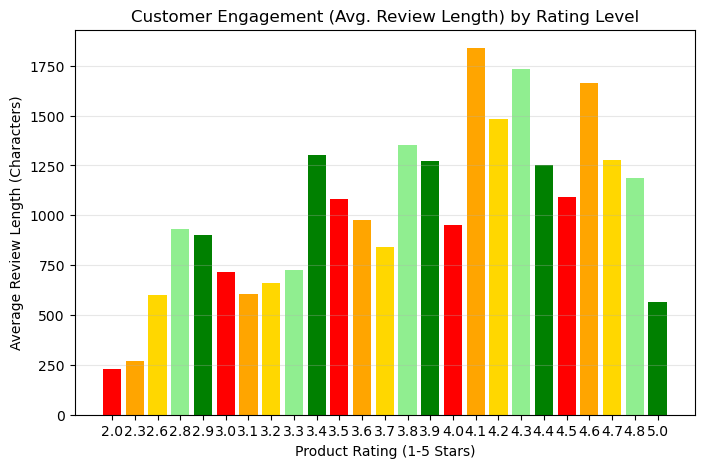

Step 13 & 14 Complete: Chart created. 5-star ratings are the 'top-performing region'.


In [14]:
# Step 13 & 14: Create a Bar Chart for 'Top Performing Sentiment Regions'
plt.figure(figsize=(8,5))
plt.bar(sentiment_by_rating.index.astype(str), sentiment_by_rating['avg_review_length'], color=['red', 'orange', 'gold', 'lightgreen', 'green'])
plt.title('Customer Engagement (Avg. Review Length) by Rating Level')
plt.xlabel('Product Rating (1-5 Stars)')
plt.ylabel('Average Review Length (Characters)')
plt.grid(True, alpha=0.3, axis='y')
plt.show()
print("Step 13 & 14 Complete: Chart created. 5-star ratings are the 'top-performing region'.")

In [15]:
# Save your fully analyzed dataset with all new insights
df.to_csv('amazon_sales_FULL_ANALYSIS.csv', index=False)
print("Step 18 Complete: Final dataset saved as 'amazon_sales_FULL_ANALYSIS.csv'")

Step 18 Complete: Final dataset saved as 'amazon_sales_FULL_ANALYSIS.csv'
